In [1]:
import re

# Specify the path to your text file
file_path = '/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_64_K2500/logs/LOG_INFO_2023-12-16_17:52:47.269520.txt'

# Open the file and read its contents
with open(file_path, 'r') as file:
    log_content = file.readlines()

# Initialize variables
epoch_data = []
current_epoch = None
current_training_stats = None
current_evaluation_stats = None

# Iterate over each line in the log
for line in log_content:
    # Check if the line contains information about the current epoch
    if "Training epoch" in line:
        # If there is data from the previous epoch, store it
        if current_epoch is not None:
            epoch_data.append({
                "epoch": current_epoch,
                "training_stats": current_training_stats,
                "evaluation_stats": current_evaluation_stats
            })

        # Extract the epoch number
        current_epoch = int(re.search(r"Training epoch \[\s*(\d+)", line).group(1))
        # Reset the current training and evaluation stats
        current_training_stats = None
        current_evaluation_stats = None

    # Check if the line contains information about training stats
    elif "==> Training stats:" in line:
        # Extract the dictionary from the line
        match = re.search(r"==> Training stats: (.+)", line)
        if match:
            current_training_stats = eval(match.group(1))

    # Check if the line contains information about evaluation stats
    elif "==> Evaluation stats:" in line:
        # Extract the dictionary from the line
        match = re.search(r"==> Evaluation stats: (.+)", line)
        if match:
            current_evaluation_stats = eval(match.group(1))

# If there is data from the last epoch, store it
if current_epoch is not None:
    epoch_data.append({
        "epoch": current_epoch,
        "training_stats": current_training_stats,
        "evaluation_stats": current_evaluation_stats
    })

# Now epoch_data contains a list of dictionaries, where each dict


In [2]:
epoch_data

[{'epoch': 1,
  'training_stats': {'prec1': 69.5472,
   'prec5': 97.3525,
   'loss': 3.2183,
   'load_time': 5.5027,
   'process_time': 94.4973},
  'evaluation_stats': {'prec1': 72.0541,
   'prec5': 98.0195,
   'loss': 2.8433,
   'load_time': 6.6586,
   'process_time': 93.3414}},
 {'epoch': 2,
  'training_stats': {'prec1': 72.0508,
   'prec5': 98.1118,
   'loss': 2.5359,
   'load_time': 5.5764,
   'process_time': 94.4236},
  'evaluation_stats': {'prec1': 72.502,
   'prec5': 98.3877,
   'loss': 2.5852,
   'load_time': 6.4955,
   'process_time': 93.5045}},
 {'epoch': 3,
  'training_stats': {'prec1': 71.5533,
   'prec5': 98.0059,
   'loss': 2.6179,
   'load_time': 5.5193,
   'process_time': 94.4807},
  'evaluation_stats': {'prec1': 72.711,
   'prec5': 98.2584,
   'loss': 2.622,
   'load_time': 6.5921,
   'process_time': 93.4079}},
 {'epoch': 4,
  'training_stats': {'prec1': 71.7012,
   'prec5': 98.0279,
   'loss': 2.5672,
   'load_time': 5.4863,
   'process_time': 94.5137},
  'evaluation_

In [3]:
epoch_data[0]

{'epoch': 1,
 'training_stats': {'prec1': 69.5472,
  'prec5': 97.3525,
  'loss': 3.2183,
  'load_time': 5.5027,
  'process_time': 94.4973},
 'evaluation_stats': {'prec1': 72.0541,
  'prec5': 98.0195,
  'loss': 2.8433,
  'load_time': 6.6586,
  'process_time': 93.3414}}

In [4]:
epoch_data[0].keys()

dict_keys(['epoch', 'training_stats', 'evaluation_stats'])

In [5]:
epoch_data[0]['training_stats']

{'prec1': 69.5472,
 'prec5': 97.3525,
 'loss': 3.2183,
 'load_time': 5.5027,
 'process_time': 94.4973}

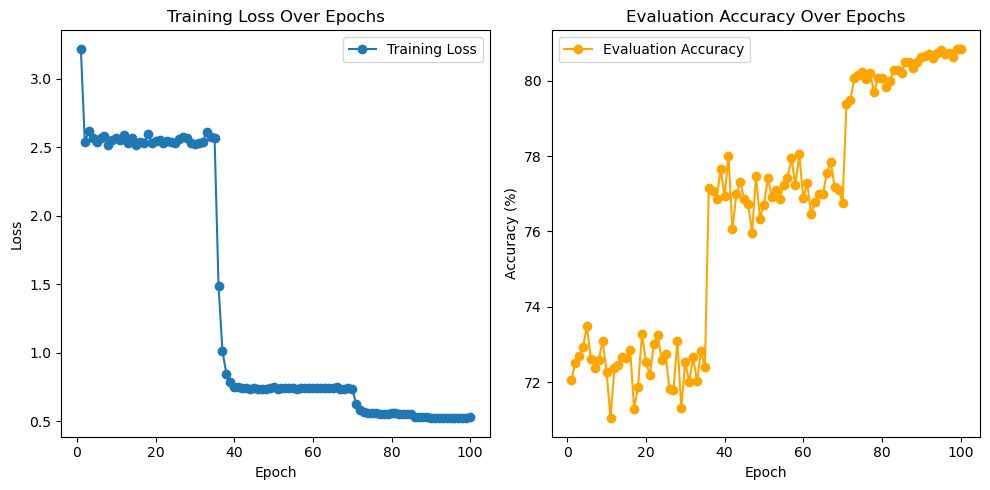

In [6]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(epoch_data):
    epochs = [entry['epoch'] for entry in epoch_data]
    training_loss = [entry['training_stats']['loss'] for entry in epoch_data]
    evaluation_accuracy = [entry['evaluation_stats']['prec1'] for entry in epoch_data]

    # Plot Loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, training_loss, label='Training Loss', marker='o')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, evaluation_accuracy, label='Evaluation Accuracy', marker='o', color='orange')
    plt.title('Evaluation Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
plot_loss_and_accuracy(epoch_data)


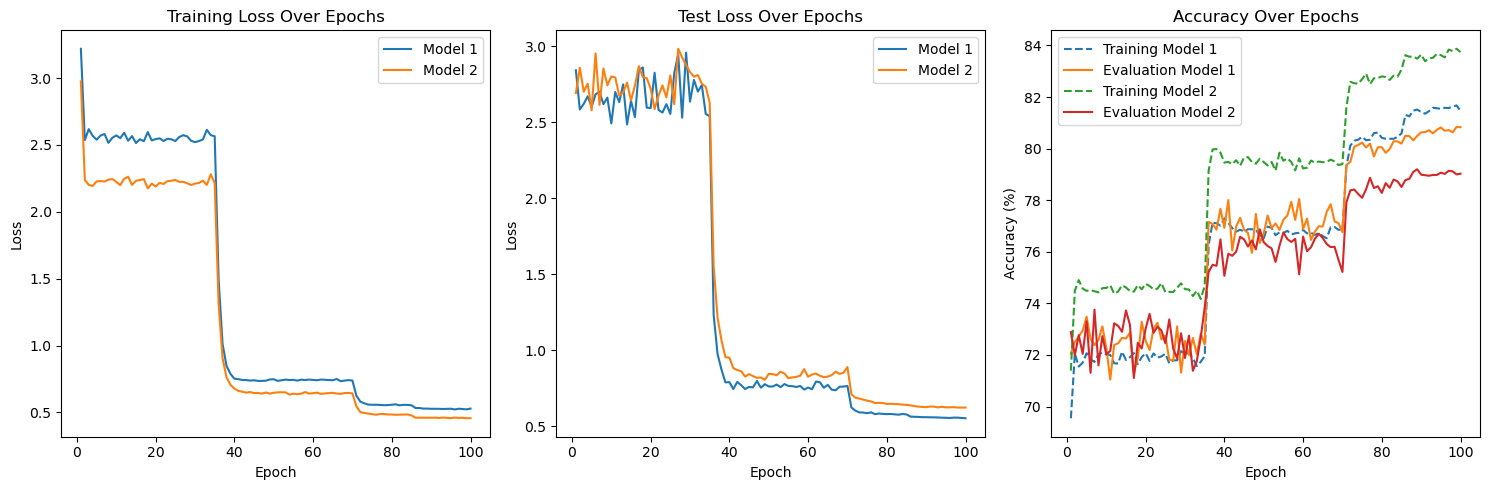

In [7]:
import os
import re
import matplotlib.pyplot as plt

def plot_metrics_for_models(model_paths):
    all_epoch_data = []

    for model_path in model_paths:
        # Open the file and read its contents
        with open(model_path, 'r') as file:
            log_content = file.readlines()

        # Initialize variables for the current model
        epoch_data = []
        current_epoch = None
        current_training_stats = None
        current_evaluation_stats = None

        # Iterate over each line in the log
        for line in log_content:
            # Check if the line contains information about the current epoch
            if "Training epoch" in line:
                # If there is data from the previous epoch, store it
                if current_epoch is not None:
                    epoch_data.append({
                        "epoch": current_epoch,
                        "training_stats": current_training_stats,
                        "evaluation_stats": current_evaluation_stats
                    })

                # Extract the epoch number
                current_epoch = int(re.search(r"Training epoch \[\s*(\d+)", line).group(1))
                # Reset the current training and evaluation stats
                current_training_stats = None
                current_evaluation_stats = None

            # Check if the line contains information about training stats
            elif "==> Training stats:" in line:
                # Extract the dictionary from the line
                match = re.search(r"==> Training stats: (.+)", line)
                if match:
                    current_training_stats = eval(match.group(1))

            # Check if the line contains information about evaluation stats
            elif "==> Evaluation stats:" in line:
                # Extract the dictionary from the line
                match = re.search(r"==> Evaluation stats: (.+)", line)
                if match:
                    current_evaluation_stats = eval(match.group(1))

        # If there is data from the last epoch, store it
        if current_epoch is not None:
            epoch_data.append({
                "epoch": current_epoch,
                "training_stats": current_training_stats,
                "evaluation_stats": current_evaluation_stats
            })

        # Store the epoch data for the current model
        all_epoch_data.append(epoch_data)

    # Plotting
    plt.figure(figsize=(15, 5))

    # Plot Training Loss
    plt.subplot(1, 3, 1)
    for i, epoch_data in enumerate(all_epoch_data):
        epochs = [entry['epoch'] for entry in epoch_data]
        training_loss = [entry['training_stats']['loss'] for entry in epoch_data]
        plt.plot(epochs, training_loss, label=f'Model {i+1}')

    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Test Loss
    plt.subplot(1, 3, 2)
    for i, epoch_data in enumerate(all_epoch_data):
        epochs = [entry['epoch'] for entry in epoch_data]
        evaluation_loss = [entry['evaluation_stats']['loss'] for entry in epoch_data]
        plt.plot(epochs, evaluation_loss, label=f'Model {i+1}')

    plt.title('Test Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training Accuracy and Evaluation Accuracy
    plt.subplot(1, 3, 3)
    for i, epoch_data in enumerate(all_epoch_data):
        epochs = [entry['epoch'] for entry in epoch_data]
        training_accuracy = [entry['training_stats']['prec1'] for entry in epoch_data]
        evaluation_accuracy = [entry['evaluation_stats']['prec1'] for entry in epoch_data]
        plt.plot(epochs, training_accuracy, label=f'Training Model {i+1}', linestyle='--')
        plt.plot(epochs, evaluation_accuracy, label=f'Evaluation Model {i+1}', linestyle='-')

    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
model_paths = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_64_K2500/logs/LOG_INFO_2023-12-16_17:52:47.269520.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_64_K1000/logs/LOG_INFO_2023-12-16_18:05:15.964140.txt"
]

plot_metrics_for_models(model_paths)


In [8]:
from __future__ import print_function
import argparse
import os
import imp
import algorithms as alg
from dataloader import DataLoader, GenericDataset

/home/eao21/micromamba/envs/rotnet/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
!pwd

/home/eao21/ece661/FeatureLearningRotNet


In [10]:
!cd /home/eao21/ece661/FeatureLearningRotNet

In [11]:
!pwd

/home/eao21/ece661/FeatureLearningRotNet


In [12]:
!chdir /home/eao21/ece661/FeatureLearningRotNet

/bin/bash: chdir: command not found


In [13]:
!cd /home/eao21/ece661/FeatureLearningRotNet

In [14]:
!pwd

/home/eao21/ece661/FeatureLearningRotNet


In [15]:
from __future__ import print_function
import argparse
import os
import imp
import algorithms as alg
from dataloader import DataLoader, GenericDataset

In [16]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import Subset, DataLoader
import numpy as np

In [17]:
num_images_per_class = 1000


In [18]:
from __future__ import print_function
import argparse
import os
import imp
import algorithms as alg
from dataloader import DataLoader, GenericDataset
dataset = GenericDataset('cifar10','test', random_sized_crop=False, num_imgs_per_cat=100)
dataloader = DataLoader(dataset, batch_size=1, unsupervised=False, shuffle=False)

Files already downloaded and verified
num_imgs_per_category 100


In [98]:
config = {}
networks = {}

net_opt = {}
net_opt['num_classes'] = 4
net_opt['num_stages']  = 4
net_opt['use_avg_on_conv3'] = False

net_optim_params = {'optim_type': 'sgd', 'lr': 0.1, 'momentum':0.9, 'weight_decay': 5e-4, 'nesterov': True, 'LUT_lr':[(60, 0.1),(120, 0.02),(160, 0.004),(200, 0.0008)]}
networks['model'] = {'def_file': 'architectures/NetworkInNetwork.py', 'pretrained': None, 'opt': net_opt,  'optim_params': net_optim_params} 
config['networks'] = networks

criterions = {}
criterions['loss'] = {'ctype':'CrossEntropyLoss', 'opt':None}
config['criterions'] = criterions
config['algorithm_type'] = 'ClassificationModel'

In [20]:
exp_dir = "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_RotNet_NIN4blocks"
config['exp_dir'] = exp_dir

In [21]:
algorithm = getattr(alg, config['algorithm_type'])(config)

2023-12-18 01:48:43,477 - algorithms.Algorithm - INFO   - Algorithm options {'networks': {'model': {'def_file': 'architectures/NetworkInNetwork.py', 'pretrained': None, 'opt': {'num_classes': 4, 'num_stages': 4, 'use_avg_on_conv3': False}, 'optim_params': {'optim_type': 'sgd', 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0005, 'nesterov': True, 'LUT_lr': [(60, 0.1), (120, 0.02), (160, 0.004), (200, 0.0008)]}}}, 'criterions': {'loss': {'ctype': 'CrossEntropyLoss', 'opt': None}}, 'algorithm_type': 'ClassificationModel', 'exp_dir': '/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_RotNet_NIN4blocks'}


2023-12-18 01:48:43,478 - algorithms.Algorithm - INFO   - Set network model
2023-12-18 01:48:43,480 - algorithms.Algorithm - INFO   - ==> Initiliaze network model from file architectures/NetworkInNetwork.py with opts: {'num_classes': 4, 'num_stages': 4, 'use_avg_on_conv3': False}
2023-12-18 01:48:43,531 - algorithms.Algorithm - INFO   - Initialize criterion[loss]: CrossEntropyLoss with options: None


In [22]:
algorithm.load_pretrained

<bound method Algorithm.load_pretrained of <algorithms.ClassificationModel.ClassificationModel object at 0x7f6651f047d0>>

In [23]:
algorithm.load_checkpoint(epoch=200, train=False, suffix='')

2023-12-18 01:48:43,568 - algorithms.Algorithm - INFO   - Load checkpoint of epoch 200


In [24]:
datas = []
outs = []
labels = []
for b in dataloader():
    data, label = b
    datas.append(data)
    labels.append(label)
    out = algorithm.networks['model'](data).detach().numpy()
    outs.append(out)

/home/eao21/micromamba/envs/rotnet/lib/python3.7/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()
/home/eao21/micromamba/envs/rotnet/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input

In [25]:
outs_stack = np.vstack(outs)

In [26]:
import umap

embedding_128 = umap.UMAP().fit_transform(outs_stack)

[]

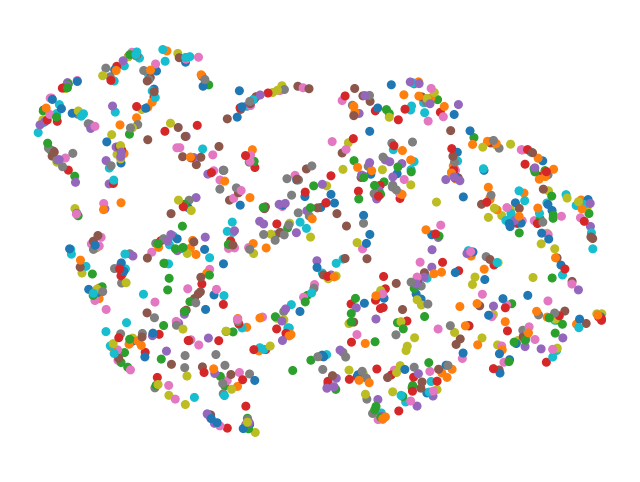

In [94]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

import seaborn as sns

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(*embedding_128.T, c=[sns.color_palette()[x] for x in labels], s=30, rasterized=True)
plt.gca().set_aspect('equal', 'datalim')
plt.axis('off')
plt.setp(ax, xticks=[], yticks=[])
# cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
# cbar.set_ticks(np.arange(10))
# cbar.set_ticklabels(classes)

In [28]:
exp_dir = "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_RotNet_NIN4blocks_64"
config['exp_dir'] = exp_dir

algorithm = getattr(alg, config['algorithm_type'])(config)
algorithm.load_pretrained
algorithm.load_checkpoint(epoch=200, train=False, suffix='')

datas = []
outs = []
labels = []
for b in dataloader():
    data, label = b
    datas.append(data)
    labels.append(label)
    out = algorithm.networks['model'](data).detach().numpy()
    outs.append(out)

outs_stack = np.vstack(outs)
embedding_64 = umap.UMAP().fit_transform(outs_stack)

2023-12-18 01:49:03,951 - algorithms.Algorithm - INFO   - Algorithm options {'networks': {'model': {'def_file': 'architectures/NetworkInNetwork.py', 'pretrained': None, 'opt': {'num_classes': 4, 'num_stages': 4, 'use_avg_on_conv3': False}, 'optim_params': {'optim_type': 'sgd', 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0005, 'nesterov': True, 'LUT_lr': [(60, 0.1), (120, 0.02), (160, 0.004), (200, 0.0008)]}}}, 'criterions': {'loss': {'ctype': 'CrossEntropyLoss', 'opt': None}}, 'algorithm_type': 'ClassificationModel', 'exp_dir': '/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_RotNet_NIN4blocks_64'}
2023-12-18 01:49:03,951 - algorithms.Algorithm - INFO   - Algorithm options {'networks': {'model': {'def_file': 'architectures/NetworkInNetwork.py', 'pretrained': None, 'opt': {'num_classes': 4, 'num_stages': 4, 'use_avg_on_conv3': False}, 'optim_params': {'optim_type': 'sgd', 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0005, 'nesterov': True, 'LUT_lr': [(60, 0.1), (120, 0.0

[]

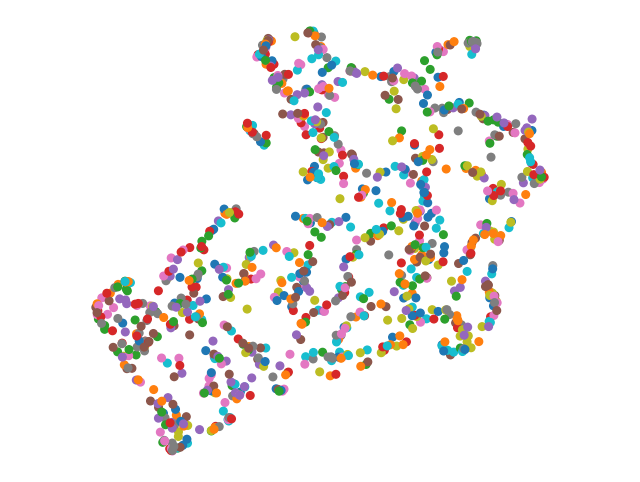

In [95]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

import seaborn as sns

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(*embedding_64.T, c=[sns.color_palette()[x] for x in labels], s=30, rasterized=True)
plt.gca().set_aspect('equal', 'datalim')
plt.axis('off')
plt.setp(ax, xticks=[], yticks=[])
# cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
# cbar.set_ticks(np.arange(10))
# cbar.set_ticklabels(classes)

2023-12-18 03:00:52,246 - algorithms.Algorithm - INFO   - Algorithm options {'networks': {'model': {'def_file': 'architectures/NetworkInNetwork.py', 'pretrained': None, 'opt': {'num_classes': 4, 'num_stages': 4, 'use_avg_on_conv3': False}, 'optim_params': {'optim_type': 'sgd', 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0005, 'nesterov': True, 'LUT_lr': [(60, 0.1), (120, 0.02), (160, 0.004), (200, 0.0008)]}}}, 'criterions': {'loss': {'ctype': 'CrossEntropyLoss', 'opt': None}}, 'algorithm_type': 'ClassificationModel', 'exp_dir': '/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_RotNet_NIN4blocks_256'}
2023-12-18 03:00:52,246 - algorithms.Algorithm - INFO   - Algorithm options {'networks': {'model': {'def_file': 'architectures/NetworkInNetwork.py', 'pretrained': None, 'opt': {'num_classes': 4, 'num_stages': 4, 'use_avg_on_conv3': False}, 'optim_params': {'optim_type': 'sgd', 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0005, 'nesterov': True, 'LUT_lr': [(60, 0.1), (120, 0.

[]

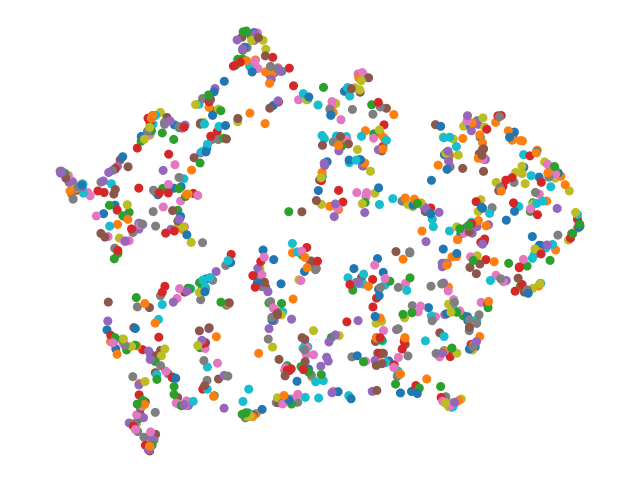

In [99]:
exp_dir = "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_RotNet_NIN4blocks_256"
config['exp_dir'] = exp_dir

algorithm = getattr(alg, config['algorithm_type'])(config)
algorithm.load_pretrained
algorithm.load_checkpoint(epoch=200, train=False, suffix='')

datas = []
outs = []
labels = []
for b in dataloader():
    data, label = b
    datas.append(data)
    labels.append(label)
    out = algorithm.networks['model'](data).detach().numpy()
    outs.append(out)

outs_stack = np.vstack(outs)
embedding_256 = umap.UMAP().fit_transform(outs_stack)

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

import seaborn as sns

fig, ax = plt.subplots(1, figsize=(8, 6))
plt.scatter(*embedding_256.T, c=[sns.color_palette()[x] for x in labels], s=30, rasterized=True)
plt.gca().set_aspect('equal', 'datalim')
plt.axis('off')
plt.setp(ax, xticks=[], yticks=[])
# cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
# cbar.set_ticks(np.arange(10))
# cbar.set_ticklabels(classes)

In [78]:
exp_dir = "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_RotNet_NIN4blocks"
config['exp_dir'] = exp_dir

algorithm = getattr(alg, config['algorithm_type'])(config)
algorithm.load_pretrained
algorithm.load_checkpoint(epoch=200, train=False, suffix='')

datas = []
outs = []
labels = []
for b in dataloader():
    data, label = b
    datas.append(data)
    labels.append(label)
    out = algorithm.networks['model'](data, out_feat_keys=algorithm.networks['model'].all_feat_names)
    outs.append(out)

allfeats = []
for i in range(5):
    feats = []
    for j in range(len(outs)):
        feats.append(outs[j][i].detach().numpy())
    allfeats.append(feats)
            

    outs_stack = np.vstack(feats)
    embedding = umap.UMAP().fit_transform(outs_stack)

    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    import seaborn as sns

    fig, ax = plt.subplots(1, figsize=(14, 10))
    plt.scatter(*embedding.T, c=[sns.color_palette()[x] for x in labels], s=12, rasterized=True)
    plt.gca().set_aspect('equal', 'datalim')
    plt.axis('off')
    plt.setp(ax, xticks=[], yticks=[])
    plt.savefig(f"umap_layer{i}.pdf")
    plt.savefig(f"umap_layer{i}.png")
    plt.savefig(f"umap_layer{i}.svg")
    plt.show()
    # cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
    # cbar.set_ticks(np.arange(10))
    # cbar.set_ticklabels(classes)

2023-12-18 02:07:40,341 - algorithms.Algorithm - INFO   - Algorithm options {'networks': {'model': {'def_file': 'architectures/NetworkInNetwork.py', 'pretrained': None, 'opt': {'num_classes': 4, 'num_stages': 4, 'use_avg_on_conv3': False}, 'optim_params': {'optim_type': 'sgd', 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0005, 'nesterov': True, 'LUT_lr': [(60, 0.1), (120, 0.02), (160, 0.004), (200, 0.0008)]}}}, 'criterions': {'loss': {'ctype': 'CrossEntropyLoss', 'opt': None}}, 'algorithm_type': 'ClassificationModel', 'exp_dir': '/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_RotNet_NIN4blocks'}
2023-12-18 02:07:40,341 - algorithms.Algorithm - INFO   - Algorithm options {'networks': {'model': {'def_file': 'architectures/NetworkInNetwork.py', 'pretrained': None, 'opt': {'num_classes': 4, 'num_stages': 4, 'use_avg_on_conv3': False}, 'optim_params': {'optim_type': 'sgd', 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0005, 'nesterov': True, 'LUT_lr': [(60, 0.1), (120, 0.02),

ValueError: Found array with dim 4. Estimator expected <= 2.

In [86]:
config = {}

networks = {}
feat_net_opt = {'num_classes': 4, 'num_stages': 4, 'use_avg_on_conv3': False}
feat_pretrained_file = './experiments/CIFAR10_RotNet_NIN4blocks/model_net_epoch200'
networks['feat_extractor'] = {'def_file': 'architectures/NetworkInNetwork.py', 'pretrained': feat_pretrained_file, 'opt': feat_net_opt,  'optim_params': None} 

cls_net_optim_params = {'optim_type': 'sgd', 'lr': 0.1, 'momentum':0.9, 'weight_decay': 5e-4, 'nesterov': True, 'LUT_lr':[(35, 0.1),(70, 0.02),(85, 0.004),(100, 0.0008)]}
cls_net_opt = {'num_classes':10, 'nChannels':192, 'cls_type':'NIN_ConvBlock3', 'pool_size':2}
networks['classifier'] = {'def_file': 'architectures/LinearClassifier.py', 'pretrained': None, 'opt': cls_net_opt, 'optim_params': cls_net_optim_params}
config['out_feat_keys'] = ['conv2']

config['networks'] = networks

criterions = {}
criterions['loss'] = {'ctype':'CrossEntropyLoss', 'opt':None}
config['criterions'] = criterions
config['algorithm_type'] = 'FeatureClassificationModel'
config['best_metric'] = 'prec1'

exp_dir = "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats"
config['exp_dir'] = exp_dir

algorithm = getattr(alg, config['algorithm_type'])(config)
algorithm.load_pretrained
algorithm.load_network(epoch=97, net_key='classifier')

datas = []
outs = []
labels = []
for b in dataloader():
    data, label = b
    datas.append(data)
    labels.append(label)
    out = algorithm.networks['model'](data, out_feat_keys=algorithm.networks['model'].all_feat_names)
    outs.append(out)

# allfeats = []
# for i in range(5):
#     feats = []
#     for j in range(len(outs)):
#         feats.append(outs[j][i].detach().numpy())
#     allfeats.append(feats)
            

#     outs_stack = np.vstack(feats)
#     embedding = umap.UMAP().fit_transform(outs_stack)

#     classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # import seaborn as sns

    # fig, ax = plt.subplots(1, figsize=(14, 10))
    # plt.scatter(*embedding.T, c=[sns.color_palette()[x] for x in labels], s=12, rasterized=True)
    # plt.gca().set_aspect('equal', 'datalim')
    # plt.axis('off')
    # plt.setp(ax, xticks=[], yticks=[])
    # plt.savefig(f"umap_layer{i}.pdf")
    # plt.savefig(f"umap_layer{i}.png")
    # plt.savefig(f"umap_layer{i}.svg")
    # plt.show()
    # cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
    # cbar.set_ticks(np.arange(10))
    # cbar.set_ticklabels(classes)

2023-12-18 02:16:00,478 - algorithms.Algorithm - INFO   - Algorithm options {'out_feat_keys': ['conv2'], 'networks': {'feat_extractor': {'def_file': 'architectures/NetworkInNetwork.py', 'pretrained': './experiments/CIFAR10_RotNet_NIN4blocks/model_net_epoch200', 'opt': {'num_classes': 4, 'num_stages': 4, 'use_avg_on_conv3': False}, 'optim_params': None}, 'classifier': {'def_file': 'architectures/LinearClassifier.py', 'pretrained': None, 'opt': {'num_classes': 10, 'nChannels': 192, 'cls_type': 'NIN_ConvBlock3', 'pool_size': 2}, 'optim_params': {'optim_type': 'sgd', 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0005, 'nesterov': True, 'LUT_lr': [(35, 0.1), (70, 0.02), (85, 0.004), (100, 0.0008)]}}}, 'criterions': {'loss': {'ctype': 'CrossEntropyLoss', 'opt': None}}, 'algorithm_type': 'FeatureClassificationModel', 'best_metric': 'prec1', 'exp_dir': '/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats'}
2023-12-18 02:16:00,478 - alg

2023-12-18 02:16:00,478 - algorithms.Algorithm - INFO   - Algorithm options {'out_feat_keys': ['conv2'], 'networks': {'feat_extractor': {'def_file': 'architectures/NetworkInNetwork.py', 'pretrained': './experiments/CIFAR10_RotNet_NIN4blocks/model_net_epoch200', 'opt': {'num_classes': 4, 'num_stages': 4, 'use_avg_on_conv3': False}, 'optim_params': None}, 'classifier': {'def_file': 'architectures/LinearClassifier.py', 'pretrained': None, 'opt': {'num_classes': 10, 'nChannels': 192, 'cls_type': 'NIN_ConvBlock3', 'pool_size': 2}, 'optim_params': {'optim_type': 'sgd', 'lr': 0.1, 'momentum': 0.9, 'weight_decay': 0.0005, 'nesterov': True, 'LUT_lr': [(35, 0.1), (70, 0.02), (85, 0.004), (100, 0.0008)]}}}, 'criterions': {'loss': {'ctype': 'CrossEntropyLoss', 'opt': None}}, 'algorithm_type': 'FeatureClassificationModel', 'best_metric': 'prec1', 'exp_dir': '/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats'}
2023-12-18 02:16:00,478 - alg

AssertionError: 

In [83]:
algorithm.load_network()

TypeError: load_network() missing 2 required positional arguments: 'net_key' and 'epoch'

1000

In [31]:
import os
import re
import matplotlib.pyplot as plt

def extract_model_stats(model_paths):
    all_epoch_data = []

    for model_path in model_paths:
        # Open the file and read its contents
        with open(model_path, 'r') as file:
            log_content = file.readlines()

        # Initialize variables for the current model
        epoch_data = []
        current_epoch = None
        current_training_stats = None
        current_evaluation_stats = None

        # Iterate over each line in the log
        for line in log_content:
            # Check if the line contains information about the current epoch
            if "Training epoch" in line:
                # If there is data from the previous epoch, store it
                if current_epoch is not None:
                    epoch_data.append({
                        "epoch": current_epoch,
                        "training_stats": current_training_stats,
                        "evaluation_stats": current_evaluation_stats
                    })

                # Extract the epoch number
                current_epoch = int(re.search(r"Training epoch \[\s*(\d+)", line).group(1))
                # Reset the current training and evaluation stats
                current_training_stats = None
                current_evaluation_stats = None

            # Check if the line contains information about training stats
            elif "==> Training stats:" in line:
                # Extract the dictionary from the line
                match = re.search(r"==> Training stats: (.+)", line)
                if match:
                    current_training_stats = eval(match.group(1))

            # Check if the line contains information about evaluation stats
            elif "==> Evaluation stats:" in line:
                # Extract the dictionary from the line
                match = re.search(r"==> Evaluation stats: (.+)", line)
                if match:
                    current_evaluation_stats = eval(match.group(1))

        # If there is data from the last epoch, store it
        if current_epoch is not None:
            epoch_data.append({
                "epoch": current_epoch,
                "training_stats": current_training_stats,
                "evaluation_stats": current_evaluation_stats
            })

        # Store the epoch data for the current model
        all_epoch_data.append(epoch_data)

    return all_epoch_data    

    # # Plotting
    # plt.figure(figsize=(15, 5))

    # # Plot Training Loss
    # plt.subplot(1, 3, 1)
    # for i, epoch_data in enumerate(all_epoch_data):
    #     epochs = [entry['epoch'] for entry in epoch_data]
    #     training_loss = [entry['training_stats']['loss'] for entry in epoch_data]
    #     plt.plot(epochs, training_loss, label=f'Model {i+1}')

    # plt.title('Training Loss Over Epochs')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()

    # # Plot Test Loss
    # plt.subplot(1, 3, 2)
    # for i, epoch_data in enumerate(all_epoch_data):
    #     epochs = [entry['epoch'] for entry in epoch_data]
    #     evaluation_loss = [entry['evaluation_stats']['loss'] for entry in epoch_data]
    #     plt.plot(epochs, evaluation_loss, label=f'Model {i+1}')

    # plt.title('Test Loss Over Epochs')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()

    # # Plot Training Accuracy and Evaluation Accuracy
    # plt.subplot(1, 3, 3)
    # for i, epoch_data in enumerate(all_epoch_data):
    #     epochs = [entry['epoch'] for entry in epoch_data]
    #     training_accuracy = [entry['training_stats']['prec1'] for entry in epoch_data]
    #     evaluation_accuracy = [entry['evaluation_stats']['prec1'] for entry in epoch_data]
    #     plt.plot(epochs, training_accuracy, label=f'Training Model {i+1}', linestyle='--')
    #     plt.plot(epochs, evaluation_accuracy, label=f'Evaluation Model {i+1}', linestyle='-')

    # plt.title('Accuracy Over Epochs')
    # plt.xlabel('Epoch')
    # plt.ylabel('Accuracy (%)')
    # plt.legend()

    # plt.tight_layout()
    # plt.show()

# Example usage:
model_paths = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_64_K2500/logs/LOG_INFO_2023-12-16_17:52:47.269520.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_64_K1000/logs/LOG_INFO_2023-12-16_18:05:15.964140.txt"
]

data = extract_model_stats(model_paths)


In [32]:
paths5000 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_64_64/logs/LOG_INFO_2023-12-17_03:58:15.531086.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats/logs/LOG_INFO_2023-12-12_13:58:02.859108.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_256_256/logs/LOG_INFO_2023-12-17_06:04:31.331408.txt"
]

suppaths5000 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_64/logs/LOG_INFO_2023-12-17_03:57:34.514958.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN/logs/LOG_INFO_2023-12-11_10:57:02.017800.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_256/logs/LOG_INFO_2023-12-17_09:17:00.871968.txt"
]

paths2500 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_64_K2500_64/logs/LOG_INFO_2023-12-17_04:19:13.055383.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_K2500/logs/LOG_INFO_2023-12-15_19:50:24.166791.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_256_K2500_256/logs/LOG_INFO_2023-12-17_06:19:56.613293.txt"
]

suppaths2500 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K2500_64/logs/LOG_INFO_2023-12-17_19:12:35.864934.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K2500/logs/LOG_INFO_2023-12-17_18:30:10.119184.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K2500_256/logs/LOG_INFO_2023-12-17_20:00:03.331152.txt"]

paths1000 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_64_K1000_64/logs/LOG_INFO_2023-12-17_04:40:15.030466.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_K1000/logs/LOG_INFO_2023-12-12_14:47:37.670299.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_256_K1000_256/logs/LOG_INFO_2023-12-17_06:35:18.345548.txt"
]

suppaths1000 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K1000_64/logs/LOG_INFO_2023-12-17_05:09:17.512112.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K1000/logs/LOG_INFO_2023-12-11_12:29:29.397576.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K1000_256/logs/LOG_INFO_2023-12-17_09:58:01.744443.txt"
]

paths400 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_64_K400_64/logs/LOG_INFO_2023-12-17_05:01:19.105835.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_K400/logs/LOG_INFO_2023-12-12_14:57:34.752946.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_256_K400_256/logs/LOG_INFO_2023-12-17_06:50:45.620481.txt"
]

suppaths400 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K400_64/logs/LOG_INFO_2023-12-17_06:23:56.610721.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K400/logs/LOG_INFO_2023-12-11_14:03:10.995920.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K400_256/logs/LOG_INFO_2023-12-17_10:39:00.733704.txt"
]

paths100 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_64_K100_64/logs/LOG_INFO_2023-12-17_05:22:20.783860.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_K100/logs/LOG_INFO_2023-12-12_15:07:30.497345.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_256_K100_256/logs/LOG_INFO_2023-12-17_07:06:13.792201.txt"
]

suppaths100 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K100_64/logs/LOG_INFO_2023-12-17_07:42:40.941115.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K100/logs/LOG_INFO_2023-12-11_15:36:45.563182.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K100_256/logs/LOG_INFO_2023-12-17_11:19:45.938143.txt"
]

paths20 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_64_K20_64/logs/LOG_INFO_2023-12-17_05:43:25.727922.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_K20/logs/LOG_INFO_2023-12-12_15:17:28.398379.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_256_K20_256/logs/LOG_INFO_2023-12-17_07:21:43.567255.txt",
]

suppaths20 = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K20_64/logs/LOG_INFO_2023-12-17_08:29:57.938290.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K20/logs/LOG_INFO_2023-12-11_16:45:06.452063.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K20_256/logs/LOG_INFO_2023-12-17_12:00:13.701137.txt"
]

In [33]:
data5000 = extract_model_stats(paths5000)
data2500 = extract_model_stats(paths2500)
data1000 = extract_model_stats(paths1000)
data400 = extract_model_stats(paths400)
data100 = extract_model_stats(paths100)
data20 = extract_model_stats(paths20)

supdata5000 = extract_model_stats(suppaths5000)
supdata2500 = extract_model_stats(suppaths2500)
supdata1000 = extract_model_stats(suppaths1000)
supdata400 = extract_model_stats(suppaths400)
supdata100 = extract_model_stats(suppaths100)
supdata20 = extract_model_stats(suppaths20)

In [34]:
unsupervised = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_RotNet_NIN4blocks_64/logs/LOG_INFO_2023-12-16_21:43:55.672495.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_RotNet_NIN4blocks/logs/LOG_INFO_2023-12-11_10:56:13.514468.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_RotNet_NIN4blocks_256/logs/LOG_INFO_2023-12-17_00:34:00.298304.txt"
]

In [35]:
unsupervised = extract_model_stats(unsupervised)

In [36]:
unsupervised[0][0]

{'epoch': 1,
 'training_stats': {'prec1': 62.9211,
  'loss': 0.8879,
  'load_time': 57.8921,
  'process_time': 42.1079},
 'evaluation_stats': {'prec1': 66.7396,
  'loss': 0.8734,
  'load_time': 3.9771,
  'process_time': 96.0229}}

In [37]:
def plot_training_loss(all_epoch_data, models=None, colors=None):
    for i, epoch_data in enumerate(all_epoch_data):
        epochs = [entry['epoch'] for entry in epoch_data]
        training_loss = [entry['training_stats']['loss'] for entry in epoch_data]
        if models or colors is None:
            plt.plot(epochs, training_loss)
    else: plt.plot(epochs, training_loss, label=models[i], c=colors[i])

def plot_test_loss(all_epoch_data, models=None, colors=None):
    for i, epoch_data in enumerate(all_epoch_data):
        epochs = [entry['epoch'] for entry in epoch_data]
        evaluation_loss = [entry['evaluation_stats']['loss'] for entry in epoch_data]
        if models or colors is None:
            plt.plot(epochs, evaluation_loss)
        else: plt.plot(epochs, evaluation_loss, label=models[i], c=colors[i])

def plot_test_accuracy(all_epoch_data, models=None, colors=None):
    for i, epoch_data in enumerate(all_epoch_data):
        epochs = [entry['epoch'] for entry in epoch_data]
        evaluation_accuracy = [entry['evaluation_stats']['prec1'] for entry in epoch_data]
        if models or colors is None:
            plt.plot(epochs, evaluation_accuracy)
        else: plt.plot(epochs, evaluation_accuracy, label=models[i], c=colors[i])

def plot_train_accuracy(all_epoch_data, models=None, colors=None):
    for i, epoch_data in enumerate(all_epoch_data):
        epochs = [entry['epoch'] for entry in epoch_data]
        training_accuracy = [entry['training_stats']['prec1'] for entry in epoch_data]
        if models or colors is None:
            plt.plot(epochs, training_accuracy)
        else: plt.plot(epochs, training_accuracy, label=models[i], colors=None)

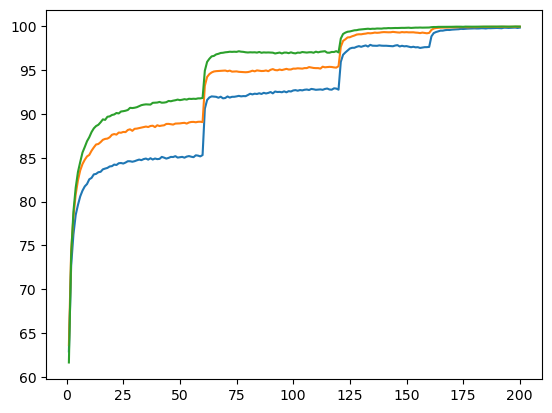

In [38]:
plot_train_accuracy(unsupervised)

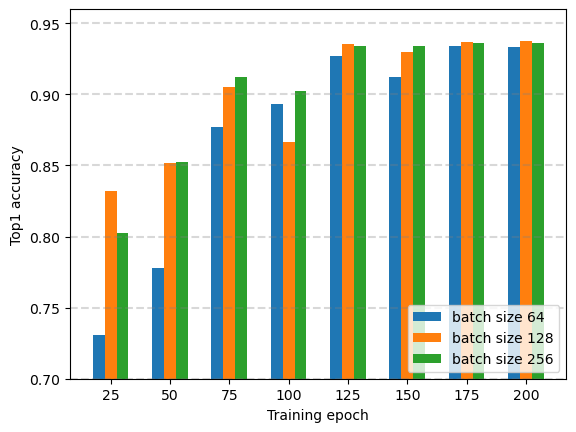

In [39]:
import matplotlib.pyplot as plt
import numpy as np

categories = []
array3 = []
array2 = []
array1 = []
# Example data (replace this with your actual data)
for i in np.arange(25, 225, 25):
    categories.append(str(i))
    array3.append(unsupervised[2][i-1]['evaluation_stats']['prec1']*10**-2)
    array2.append(unsupervised[1][i-1]['evaluation_stats']['prec1']*10**-2)
    array1.append(unsupervised[0][i-1]['evaluation_stats']['prec1']*10**-2)
# Bar width
bar_width = 0.2
for y in np.arange(0.5, 1.0, 0.05):
    plt.axhline(y, color='gray', linestyle='--', alpha=0.3)
# Set up positions for three bars for each category
positions = np.arange(len(categories))
bar1_positions = positions - bar_width
bar2_positions = positions
bar3_positions = positions + bar_width
# Create the bar plot
plt.bar(bar1_positions, array1, width=bar_width, label='batch size 64')
plt.bar(bar2_positions, array2, width=bar_width, label='batch size 128')
plt.bar(bar3_positions, array3, width=bar_width, label='batch size 256')
# Set labels and title
plt.xlabel('Training epoch')
plt.ylabel('Top1 accuracy')
plt.xticks(positions, categories)
plt.ylim(0.7, 0.96)
plt.legend(loc='lower right')
# Show the plot
plt.savefig('barplot.svg')
plt.savefig('barplot.pdf')
plt.show()


In [40]:
array2

[0.8322539999999999,
 0.8514390000000001,
 0.9052119999999999,
 0.8668170000000001,
 0.9352010000000001,
 0.9299590000000001,
 0.937179,
 0.937302]

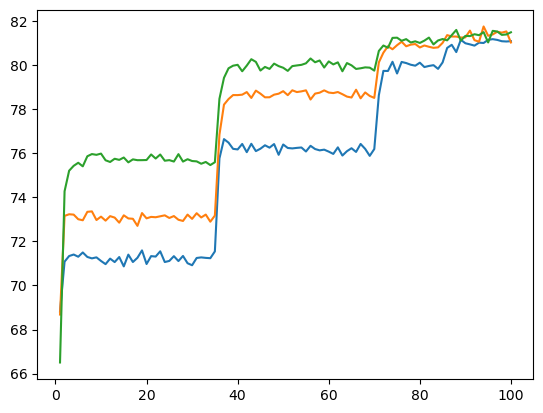

In [41]:
plt.close()
plot_train_accuracy(data5000)

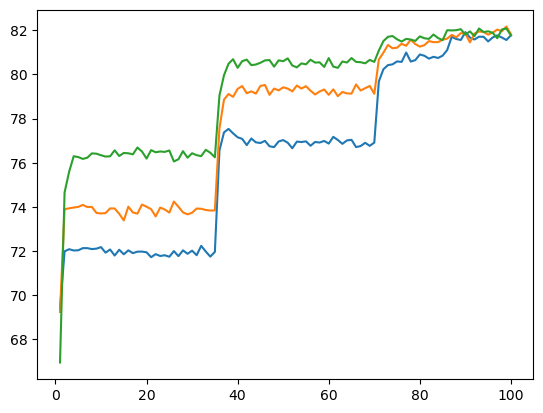

In [42]:
plot_train_accuracy(data2500)

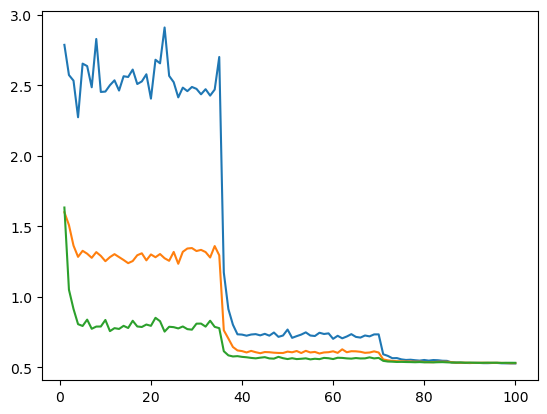

In [43]:
plot_test_loss(data5000)

In [44]:
unsup_acc = []
for i in range(3):
    u = []
    for j in range(len(unsupervised[i])):
        u.append(unsupervised[i][j]['evaluation_stats']['prec1']*10**-2)
    unsup_acc.append(u)

In [45]:
obj_recog_sup_batch = []
for i in range(len(supdata5000)):
    obj_recog_sup = []
    for j in range(len(supdata5000[0])):
        obj_recog_sup.append(supdata5000[i][j]['evaluation_stats']['prec1']*10**-2)
    obj_recog_sup_batch.append(obj_recog_sup)

In [46]:
obj_ss_batch = []
for i in range(len(data5000)):
    obj_recog_sup = []
    for j in range(len(data5000[0])):
        obj_recog_sup.append(data5000[i][j]['evaluation_stats']['prec1']*10**-2)
    obj_ss_batch.append(obj_recog_sup)

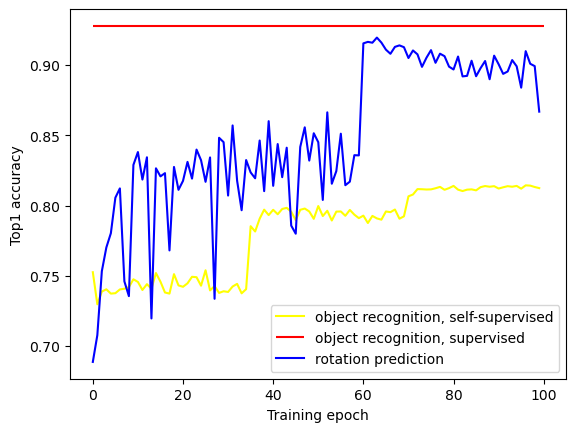

In [47]:
plt.plot(obj_ss_batch[1], c='yellow', label='object recognition, self-supervised')
plt.hlines(obj_recog_sup_batch[1][-1], xmin=0, xmax=100, color='red', label='object recognition, supervised')
plt.plot(unsup_acc[1][0:100], c='blue', label='rotation prediction')
plt.ylabel('Top1 accuracy')
plt.xlabel('Training epoch')
plt.legend()
plt.savefig('lin_pred_acc.svg')
plt.savefig('lin_pred_acc.pdf')

In [48]:
conv_ss_path = ["/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_ConvClassifier_on_RotNet_NIN4blocks_Conv2_feats/logs/LOG_INFO_2023-12-12_11:34:16.584952.txt"]

conv_ss_data = extract_model_stats(conv_ss_path)
conv_ss_acc = []
for i in range(len(conv_ss_data[0])):
    conv_ss_acc.append(conv_ss_data[0][i]['evaluation_stats']['prec1']*10**-2)

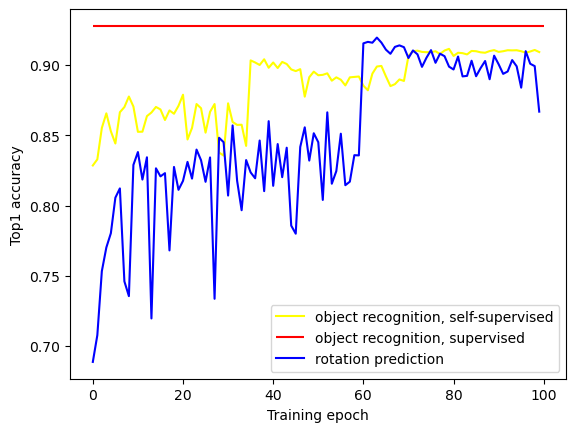

In [49]:
plt.plot(conv_ss_acc, c='yellow', label='object recognition, self-supervised')
plt.hlines(obj_recog_sup_batch[1][-1], xmin=0, xmax=100, color='red', label='object recognition, supervised')
plt.plot(unsup_acc[1][0:100], c='blue', label='rotation prediction')
plt.ylabel('Top1 accuracy')
plt.xlabel('Training epoch')
plt.legend()
plt.savefig('conv_pred_acc.svg')
plt.savefig('conv_pred_acc.pdf')

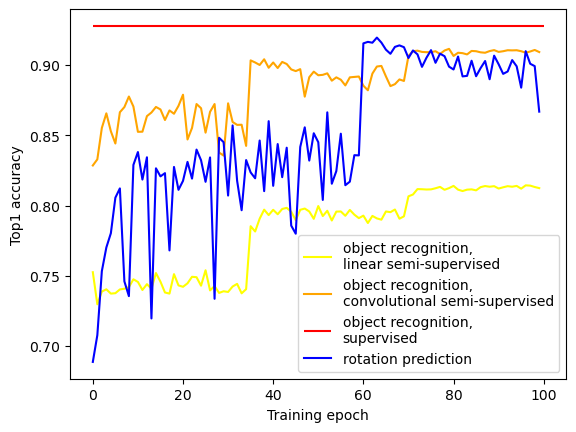

In [89]:
plt.plot(obj_ss_batch[1], c='yellow', label='object recognition,\nlinear semi-supervised')
plt.plot(conv_ss_acc, c='orange', label='object recognition,\nconvolutional semi-supervised')
plt.hlines(obj_recog_sup_batch[1][-1], xmin=0, xmax=100, color='red', label='object recognition,\nsupervised')
plt.plot(unsup_acc[1][0:100], c='blue', label='rotation prediction')
plt.ylabel('Top1 accuracy')
plt.xlabel('Training epoch')
plt.legend()
plt.savefig('lin_pred_acc.svg')
plt.savefig('lin_pred_acc.pdf')

In [51]:
# Test accuracy as a function of number of training examples

supkpaths = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K20/logs/LOG_INFO_2023-12-11_16:45:06.452063.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K100/logs/LOG_INFO_2023-12-11_15:36:45.563182.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K400/logs/LOG_INFO_2023-12-11_14:03:10.995920.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K1000/logs/LOG_INFO_2023-12-11_12:29:29.397576.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN_K2500/logs/LOG_INFO_2023-12-17_18:30:10.119184.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_supervised_NIN/logs/LOG_INFO_2023-12-11_10:57:02.017800.txt"
]

sslinkpaths = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_K20/logs/LOG_INFO_2023-12-12_15:17:28.398379.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_K100/logs/LOG_INFO_2023-12-12_15:07:30.497345.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_K400/logs/LOG_INFO_2023-12-12_14:57:34.752946.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_K1000/logs/LOG_INFO_2023-12-12_14:47:37.670299.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats_K2500/logs/LOG_INFO_2023-12-15_19:50:24.166791.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_LinearClassifier_on_RotNet_NIN4blocks_Conv2_feats/logs/LOG_INFO_2023-12-12_13:58:02.859108.txt"
]

ssconvpaths = [
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_ConvClassifier_on_RotNet_NIN4blocks_Conv2_feats_K20/logs/LOG_INFO_2023-12-12_12:26:13.123301.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_ConvClassifier_on_RotNet_NIN4blocks_Conv2_feats_K100/logs/LOG_INFO_2023-12-12_12:11:03.193542.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_ConvClassifier_on_RotNet_NIN4blocks_Conv2_feats_K400/logs/LOG_INFO_2023-12-12_11:55:57.621448.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_ConvClassifier_on_RotNet_NIN4blocks_Conv2_feats_K1000/logs/LOG_INFO_2023-12-12_11:39:21.316698.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_ConvClassifier_on_RotNet_NIN4blocks_Conv2_feats_K2500/logs/LOG_INFO_2023-12-15_19:52:11.621748.txt",
    "/home/eao21/ece661/FeatureLearningRotNet/experiments/CIFAR10_ConvClassifier_on_RotNet_NIN4blocks_Conv2_feats/logs/LOG_INFO_2023-12-12_11:34:16.584952.txt"
]

In [52]:
supk = extract_model_stats(supkpaths)
sslink = extract_model_stats(sslinkpaths)
ssconv = extract_model_stats(ssconvpaths)

In [53]:
supkaccs = []
for i in range(len(supk)):
    supkacc = []
    for j in range(len(supk[i])):
        supkacc.append(supk[i][j]['evaluation_stats']['prec1'])
    supkaccs.append(supkacc)

In [54]:
ssconvaccs = []
for i in range(len(ssconv)):
    ssconvacc = []
    for j in range(len(ssconv[i])):
        ssconvacc.append(ssconv[i][j]['evaluation_stats']['prec1'])
    ssconvaccs.append(ssconvacc)

In [55]:
sslinaccs = []
for i in range(len(sslink)):
    sslinacc = []
    for j in range(len(sslink[i])):
        sslinacc.append(sslink[i][j]['evaluation_stats']['prec1'])
    sslinaccs.append(sslinacc)

In [56]:
supaccsfin = []
sslinaccsfin = []
ssconvaccsfin = []
for i in range(6):
    supaccsfin.append(supkaccs[i][-1]*10**-2)
    sslinaccsfin.append(sslinaccs[i][-1]*10**-2)
    ssconvaccsfin.append(ssconvaccs[i][-1]*10**-2)

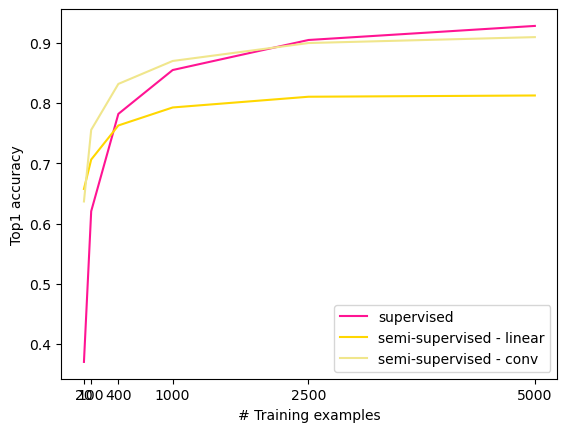

In [57]:
from matplotlib.ticker import ScalarFormatter
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker

xs = [20, 100, 400, 1000, 2500, 5000]
xticks = [20, 100, 400, 1000, 2500, 5000]
plt.xticks(xticks)
plt.yticks([0.40, 0.50, 0.60, 0.70, 0.80, 0.90])
plt.ylabel('Top1 accuracy')
plt.xlabel('# Training examples')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
# plt.xscale('log')
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:g}'.format(y)))
# from matplotlib.ticker import ScalarFormatter
# for axis in [ax.xaxis, ax.yaxis]:
#     axis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain')
plt.plot(xs, supaccsfin, c='deeppink', label='supervised')
plt.plot(xs, sslinaccsfin, c='gold', label='semi-supervised - linear')
plt.plot(xs, ssconvaccsfin, c='khaki', label='semi-supervised - conv')
plt.legend()


In [58]:
supaccsfin

[0.370352, 0.620352, 0.781843, 0.854628, 0.90447, 0.927809]

In [59]:
sslinaccsfin

[0.6573380000000001,
 0.706092,
 0.7626580000000001,
 0.792524,
 0.8103239999999999,
 0.812401]

In [60]:
ssconvaccsfin

[0.63657, 0.7553400000000001, 0.831586, 0.86966, 0.8994260000000001, 0.909217]